In [41]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium 
import datetime

In [3]:
Crimedata_path = './CrimeData-2022.csv'

# read the original dataset (in comma separated values format) into a DataFrame
Pd_Crime = pd.read_csv(Crimedata_path)

In [4]:
Pd_Crime.columns

Index(['Address', 'CaseNumber', 'CrimeAgainst', 'Neighborhood', 'OccurDate',
       'OccurTime', 'OffenseCategory', 'OffenseType', 'OpenDataLat',
       'OpenDataLon', 'OpenDataX', 'OpenDataY', 'ReportDate', 'OffenseCount'],
      dtype='object')

In [51]:
Pd_Crime.tail()

,Address,CaseNumber,CrimeAgainst,Neighborhood,OccurDate,OccurTime,OffenseCategory,OffenseType,OpenDataLat,OpenDataLon,OpenDataX,OpenDataY,ReportDate,OffenseCount
47447,WILDWOOD TRAIL AT / KEIL TRAIL,22-149523,Property,Forest Park,6/4/2022,2147,Fraud Offenses,Credit Card/ATM Fraud,45.540437,-122.736728,7629081.0,691063.0,6/4/2022,1
47448,WILDWOOD TRAIL AT / KEIL TRAIL,22-149523,Property,Forest Park,6/4/2022,2147,Larceny Offenses,Theft From Motor Vehicle,45.540437,-122.736728,7629081.0,691063.0,6/4/2022,1
47449,WILDWOOD TRAIL AT / KEIL TRAIL,22-149523,Property,Forest Park,6/4/2022,2147,Vandalism,Vandalism,45.540437,-122.736728,7629081.0,691063.0,6/4/2022,1
47450,WILDWOOD TRAIL AT / MAPLE TRAIL,22-905724,Property,Forest Park,2/26/2022,1300,Larceny Offenses,Theft From Motor Vehicle,45.552453,-122.758415,7623649.0,695597.0,2/26/2022,1
47451,WILLAMETTE RIVER WB SO / BURNSIDE BRG,22-165178,Person,NaN,6/20/2022,2110,Assault Offenses,Aggravated Assault,45.521360,-122.669297,7646165.0,683639.0,6/20/2022,1


In [9]:
crime_category = Pd_Crime.drop(['Address','CaseNumber','CrimeAgainst','OccurTime','OffenseType','OpenDataLat','OpenDataLon','OpenDataX','OpenDataY','ReportDate','OffenseCount'], axis=1)

In [52]:
crime_category.tail()

,Neighborhood,OccurDate,OffenseCategory
47447,Forest Park,6/4/2022,Fraud Offenses
47448,Forest Park,6/4/2022,Larceny Offenses
47449,Forest Park,6/4/2022,Vandalism
47450,Forest Park,2/26/2022,Larceny Offenses
47451,NaN,6/20/2022,Assault Offenses


In [28]:
NaNs_i_location = crime_category.isnull()
print(type(NaNs_i_location))
NaNs_i_location.head()

<class 'pandas.core.frame.DataFrame'>


,Neighborhood,OccurDate,OffenseCategory
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


In [29]:
NaNs_total = NaNs_i_location.sum()
NaNs_total 

Neighborhood       2125
OccurDate             0
OffenseCategory       0
dtype: int64

In [30]:
crime_category_compact = crime_category.dropna()
crime_category_compact.head()

,Neighborhood,OccurDate,OffenseCategory
0,Centennial,1/1/2022,Assault Offenses
1,Parkrose,1/1/2022,Assault Offenses
2,Parkrose,1/1/2022,Weapon Law Violations
3,Woodstock,1/1/2022,Assault Offenses
4,Woodstock,1/1/2022,Kidnapping/Abduction


In [73]:

CountCategory = crime_category_compact['OffenseCategory'].value_counts()
print(CountCategory)

Larceny Offenses                16586
Vandalism                        7569
Motor Vehicle Theft              7097
Assault Offenses                 5391
Burglary                         3747
Fraud Offenses                   1966
Robbery                           943
Weapon Law Violations             580
Sex Offenses                      354
Drug/Narcotic Offenses            297
Arson                             230
Counterfeiting/Forgery            226
Prostitution Offenses              62
Homicide Offenses                  61
Kidnapping/Abduction               57
Stolen Property Offenses           46
Pornography/Obscene Material       39
Embezzlement                       25
Extortion/Blackmail                20
Human Trafficking Offenses         18
Animal Cruelty Offenses            13
Name: OffenseCategory, dtype: int64


In [32]:
print(crime_category_compact['Neighborhood'].value_counts(ascending=True))

Healy Heights              1
Marshall Park             12
Arnold Creek              12
Crestwood                 18
Woodland Park             19
Markham                   23
Northwest Heights         27
Far Southwest             30
South Burlingame          32
Collins View              34
Maplewood                 37
Hillside                  44
Ardenwald                 49
Eastmoreland              90
Hayhurst                  90
West Portland Park        92
Bridlemile                93
Bridgeton                101
Ashcreek                 104
Alameda                  105
Sylvan-Highlands         106
Linnton                  119
Northwest Industrial     124
Vernon                   127
Arlington Heights        135
Homestead                146
Grant Park               155
Sabin                    157
Southwest Hills          164
Beaumont-Wilshire        165
                        ... 
Arbor Lodge              504
Argay                    540
Creston-Kenilworth       541
Sunnyside     

In [33]:
dataTypes = crime_category_compact.dtypes
print(dataTypes)

Neighborhood       object
OccurDate          object
OffenseCategory    object
dtype: object


In [44]:
crime_category_compact['Month'] = pd.DatetimeIndex(crime_category_compact['OccurDate']).month
crime_category_compact.head()

/srv/pl-app/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Neighborhood,OccurDate,OffenseCategory,Month,month
0,Centennial,1/1/2022,Assault Offenses,1,1
1,Parkrose,1/1/2022,Assault Offenses,1,1
2,Parkrose,1/1/2022,Weapon Law Violations,1,1
3,Woodstock,1/1/2022,Assault Offenses,1,1
4,Woodstock,1/1/2022,Kidnapping/Abduction,1,1


In [47]:
crime_category_compact = crime_category_compact.drop(['month'], axis=1)
crime_category_compact.head()

,Neighborhood,OccurDate,OffenseCategory,Month
0,Centennial,1/1/2022,Assault Offenses,1
1,Parkrose,1/1/2022,Assault Offenses,1
2,Parkrose,1/1/2022,Weapon Law Violations,1
3,Woodstock,1/1/2022,Assault Offenses,1
4,Woodstock,1/1/2022,Kidnapping/Abduction,1


In [48]:
JanCrimes = crime_category_compact[crime_category_compact['Month'] == 8]
JanCrimes

,Neighborhood,OccurDate,OffenseCategory,Month
375,Hosford-Abernethy,8/9/2021,Assault Offenses,8
417,Northwest,8/1/2021,Sex Offenses,8
1267,Parkrose,8/6/2020,Pornography/Obscene Material,8
2209,South Portland,8/30/2021,Assault Offenses,8
2943,Richmond,8/1/2022,Assault Offenses,8
2944,Parkrose,8/1/2022,Assault Offenses,8
2951,Powellhurst-Gilbert,8/1/2022,Assault Offenses,8
2952,Powellhurst-Gilbert,8/1/2022,Assault Offenses,8
2953,Foster-Powell,8/1/2022,Burglary,8
2954,Sylvan-Highlands,8/1/2022,Assault Offenses,8


In [50]:
OctCrimes = crime_category_compact[crime_category_compact['Month'] == 10]
OctCrimes

,Neighborhood,OccurDate,OffenseCategory,Month


In [49]:
print(crime_category_compact['Month'].value_counts(ascending=True))

9      49
8    5208
2    5211
6    5242
7    5610
4    5668
5    5719
3    5968
1    6652
Name: Month, dtype: int64


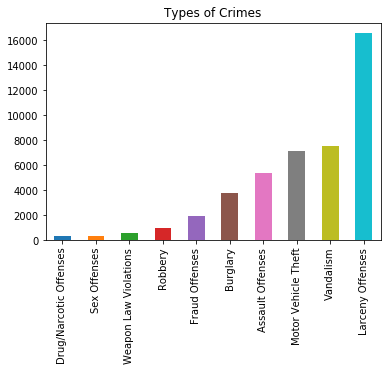

In [87]:
crime_category_compact['OffenseCategory'].value_counts().iloc[:10].sort_values().plot(kind="bar", title = "Types of Crimes")